# Exploratory Data Analysis for Captsone 2 - Solar Plants Data

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from scipy import stats
from datetime import datetime as dt
import matplotlib.dates as mdates
import calplot

### Import Data Files

In [2]:
# File path locations

solarplants_path = '../Data/solar_plants.csv'
plant1_path = '../Data/plant1.csv'
plant2_path = '../Data/plant2.csv'

In [3]:
# Read file paths into dataframes

sp_df = pd.read_csv(solarplants_path)
p1_df = pd.read_csv(plant1_path)
p2_df = pd.read_csv(plant2_path)

### View Data

In [4]:
sp_df.sample(10)

DATE_TIME  PLANT_ID_x     SOURCE_KEY_x      DC_POWER  \
30367   2020-05-30 16:30:00     4135001  zVJPv84UY57bAof   4498.571429   
131441  2020-06-15 14:45:00     4136001  Mx2yZCDsyf6DPfv    496.120000   
16966   2020-05-23 22:00:00     4135001  pkci93gMrogZuBj      0.000000   
126424  2020-06-13 05:45:00     4136001  LlT2YUhhzqhg5Sw      0.000000   
10443   2020-05-20 03:45:00     4135001  bvBOhCH3iADSZry      0.000000   
37937   2020-06-03 07:00:00     4135001  ZoEaEvLYb1n2sOq   1427.625000   
41342   2020-06-04 22:30:00     4135001  zBIq5rxdHJRwDNY      0.000000   
119944  2020-06-10 04:00:00     4136001  oZZkBaNadn6DNKz      0.000000   
60271   2020-06-13 22:45:00     4135001  bvBOhCH3iADSZry      0.000000   
44697   2020-06-06 13:00:00     4135001  z9Y9gH1T5YWrNuG  12456.750000   

           AC_POWER  DAILY_YIELD   TOTAL_YIELD  PLANT_ID_y     SOURCE_KEY_y  \
30367    441.485714  6878.428571  7.235565e+06     4135001  HmiyD2TTLFNqkNe   
131441   486.186667  1539.466667  2.672280e+06     4136001  iq8k7ZNt4Mwm3w0   
16966      0.000000  8475.000000  7.233675e+06     4135001  HmiyD2TTLFNqkNe   
126424     0.000000     0.000000  2.827630e+08     4136001  iq8k7ZNt4Mwm3w0   
10443      0.000000     0.000000  6.346907e+06     4135001  HmiyD2TTLFNqkNe   
37937    139.287500    62.000000  7.235789e+06     4135001  HmiyD2TTLFNqkNe   
41342      0.000000     0.000000  6.492579e+06     4135001  HmiyD2TTLFNqkNe   
119944     0.000000     0.000000  1.708251e+09     4136001  iq8k7ZNt4Mwm3w0   
60271      0.000000  7863.000000  6.517642e+06     4135001  HmiyD2TTLFNqkNe   
44697   1214.900000  4294.250000  7.175295e+06     4135001  HmiyD2TTLFNqkNe   

        AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION    PLANT  
30367             30.613015           39.941189     0.314397  plant_1  
131441            28.738912           35.475339     0.361479  plant_2  
16966             25.773600           23.732849     0.000000  plant_1  
126424            22.571721           22.091257     0.000495  plant_2  
10443             22.108852           19.497703     0.000000  plant_1  
37937             22.397050           24.144836     0.099086  plant_1  
41342             23.038757           20.231431     0.000000  plant_1  
119944            24.472580           23.221963     0.000000  plant_2  
60271             22.265993           19.826632     0.000000  plant_1  
44697             30.398728           55.526068     0.965451  plant_1

In [5]:
sp_df.describe()

PLANT_ID_x       DC_POWER       AC_POWER    DAILY_YIELD  \
count  1.364720e+05  136472.000000  136472.000000  136472.000000   
mean   4.135497e+06    1708.373962     274.790259    3295.366192   
std    4.999863e+02    3222.079306     380.180214    3035.313217   
min    4.135001e+06       0.000000       0.000000       0.000000   
25%    4.135001e+06       0.000000       0.000000      28.285714   
50%    4.135001e+06       5.993333       3.493095    2834.642857   
75%    4.136001e+06    1155.595000     532.568571    5992.000000   
max    4.136001e+06   14471.125000    1410.950000    9873.000000   

        TOTAL_YIELD    PLANT_ID_y  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
count  1.364720e+05  1.364720e+05        136472.000000       136472.000000   
mean   3.303916e+08  4.135497e+06            26.763066           31.920744   
std    6.085769e+08  4.999863e+02             3.897340           11.803674   
min    0.000000e+00  4.135001e+06            20.398505           18.140415   
25%    6.520020e+06  4.135001e+06            23.637604           22.411698   
50%    7.269333e+06  4.135001e+06            25.908122           26.413755   
75%    2.826096e+08  4.136001e+06            29.266583           40.778583   
max    2.247916e+09  4.136001e+06            39.181638           66.635953   

         IRRADIATION  
count  136472.000000  
mean        0.230767  
std         0.305652  
min         0.000000  
25%         0.000000  
50%         0.026213  
75%         0.442961  
max         1.221652

In [6]:
p1_df.head(), p1_df.tail()

(             DATE_TIME  PLANT_ID_x     SOURCE_KEY_x  DC_POWER  AC_POWER  \
 0  2020-05-15 00:00:00     4135001  1BY6WEcLGh8j5v7       0.0       0.0   
 1  2020-05-15 00:00:00     4135001  1IF53ai7Xc0U56Y       0.0       0.0   
 2  2020-05-15 00:00:00     4135001  3PZuoBAID5Wc2HD       0.0       0.0   
 3  2020-05-15 00:00:00     4135001  7JYdWkrLSPkdwr4       0.0       0.0   
 4  2020-05-15 00:00:00     4135001  McdE0feGgRqW7Ca       0.0       0.0   
 
    DAILY_YIELD  TOTAL_YIELD  PLANT_ID_y     SOURCE_KEY_y  AMBIENT_TEMPERATURE  \
 0          0.0    6259559.0     4135001  HmiyD2TTLFNqkNe            25.184316   
 1          0.0    6183645.0     4135001  HmiyD2TTLFNqkNe            25.184316   
 2          0.0    6987759.0     4135001  HmiyD2TTLFNqkNe            25.184316   
 3          0.0    7602960.0     4135001  HmiyD2TTLFNqkNe            25.184316   
 4          0.0    7158964.0     4135001  HmiyD2TTLFNqkNe            25.184316   
 
    MODULE_TEMPERATURE  IRRADIATION    PLANT  
 

In [7]:
p1_df.describe()

PLANT_ID_x      DC_POWER      AC_POWER   DAILY_YIELD   TOTAL_YIELD  \
count     68774.0  68774.000000  68774.000000  68774.000000  6.877400e+04   
mean    4135001.0   3147.177450    307.778375   3295.834644  6.978728e+06   
std           0.0   4036.441826    394.394865   3145.220597  4.162707e+05   
min     4135001.0      0.000000      0.000000      0.000000  6.183645e+06   
25%     4135001.0      0.000000      0.000000      0.000000  6.512007e+06   
50%     4135001.0    428.571429     41.450000   2658.473214  7.146685e+06   
75%     4135001.0   6365.468750    623.561161   6274.000000  7.268751e+06   
max     4135001.0  14471.125000   1410.950000   9163.000000  7.846821e+06   

       PLANT_ID_y  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE   IRRADIATION  
count     68774.0         68774.000000        68774.000000  68774.000000  
mean    4135001.0            25.558521           31.244997      0.232305  
std           0.0             3.361300           12.308283      0.301948  
min     4135001.0            20.398505           18.140415      0.000000  
25%     4135001.0            22.724491           21.123944      0.000000  
50%     4135001.0            24.670178           24.818984      0.031620  
75%     4135001.0            27.960429           41.693659      0.454880  
max     4135001.0            35.252486           65.545714      1.221652

In [8]:
p2_df.head(), p2_df.tail()

(             DATE_TIME  PLANT_ID_x     SOURCE_KEY_x  DC_POWER  AC_POWER  \
 0  2020-05-15 00:00:00     4136001  4UPUqMRk7TRMgml       0.0       0.0   
 1  2020-05-15 00:00:00     4136001  81aHJ1q11NBPMrL       0.0       0.0   
 2  2020-05-15 00:00:00     4136001  9kRcWv60rDACzjR       0.0       0.0   
 3  2020-05-15 00:00:00     4136001  Et9kgGMDl729KT4       0.0       0.0   
 4  2020-05-15 00:00:00     4136001  IQ2d7wF4YD8zU1Q       0.0       0.0   
 
    DAILY_YIELD   TOTAL_YIELD  PLANT_ID_y     SOURCE_KEY_y  \
 0  9425.000000  2.429011e+06     4136001  iq8k7ZNt4Mwm3w0   
 1     0.000000  1.215279e+09     4136001  iq8k7ZNt4Mwm3w0   
 2  3075.333333  2.247720e+09     4136001  iq8k7ZNt4Mwm3w0   
 3   269.933333  1.704250e+06     4136001  iq8k7ZNt4Mwm3w0   
 4  3177.000000  1.994153e+07     4136001  iq8k7ZNt4Mwm3w0   
 
    AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION    PLANT  
 0            27.004764           25.060789          0.0  plant_2  
 1            27.004764         

In [9]:
p2_df.describe()

PLANT_ID_x      DC_POWER      AC_POWER   DAILY_YIELD   TOTAL_YIELD  \
count     67698.0  67698.000000  67698.000000  67698.000000  6.769800e+04   
mean    4136001.0    246.701961    241.277825   3294.890295  6.589448e+08   
std           0.0    370.569597    362.112118   2919.448386  7.296678e+08   
min     4136001.0      0.000000      0.000000      0.000000  0.000000e+00   
25%     4136001.0      0.000000      0.000000    272.750000  1.996494e+07   
50%     4136001.0      0.000000      0.000000   2911.000000  2.826276e+08   
75%     4136001.0    446.591667    438.215000   5534.000000  1.348495e+09   
max     4136001.0   1420.933333   1385.420000   9873.000000  2.247916e+09   

       PLANT_ID_y  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE   IRRADIATION  
count     67698.0         67698.000000        67698.000000  67698.000000  
mean    4136001.0            27.986756           32.607233      0.229204  
std           0.0             4.021294           11.226446      0.309365  
min     4136001.0            20.942385           20.265123      0.000000  
25%     4136001.0            24.570349           23.685627      0.000000  
50%     4136001.0            26.910352           27.433723      0.018554  
75%     4136001.0            30.912601           40.019036      0.431027  
max     4136001.0            39.181638           66.635953      1.098766

#### Observations from looking at the dataframes and summary statistics: 
##### 1. *The two individual power plants have the date range, so we can compare the plants directly day to day.*
##### 2. *DC Power for Plant 1 is on a different scale than it is for Plant 2, about 10x higher.*
##### 3. *AC Power for Plant 1 is on the same scale as it is for Plant 2, needs to be investigated.*

### Exploratory Visualizations

<AxesSubplot:xlabel='TIME'>

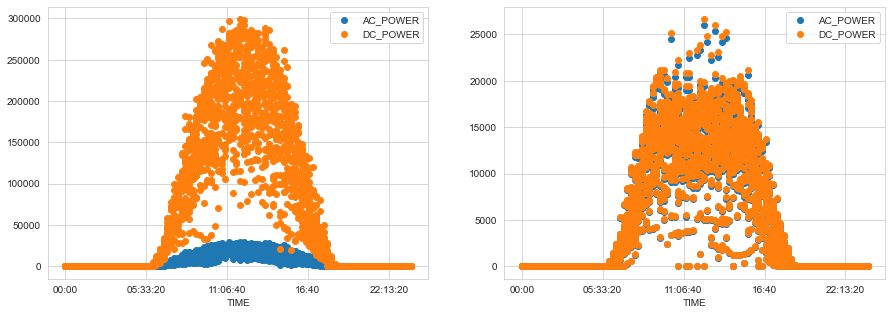

In [10]:
# Daily AC and DC Power Plots for Plant1 and Plant2

fig,ax = plt.subplots(1, 2, figsize=(15,5))

p1_test = p1_df.groupby('DATE_TIME').sum().reset_index()
p1_test['TIME']= pd.to_datetime(p1_test['DATE_TIME']).dt.time

p1_test.set_index('TIME')[['AC_POWER', 'DC_POWER']].plot(style='o', ax=ax[0])

p2_test = p2_df.groupby('DATE_TIME').sum().reset_index()
p2_test['TIME']= pd.to_datetime(p2_test['DATE_TIME']).dt.time

p2_test.set_index('TIME')[['AC_POWER', 'DC_POWER']].plot(style='o', ax=ax[1])

##### *The DC power and AC power for Plant 1 have similar trends, but on very different scales. The same data for Plant 2 completely overlaps, suggesting all of the DC power was converted to AC power, which should be impossible. Also, the distribution of daily power for Plant 2 is much less organized around mid-day, perhaps some poorly functioning equipment?*

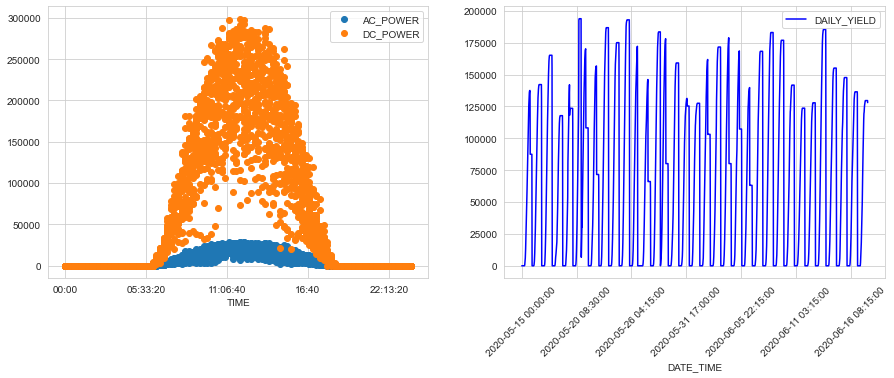

In [11]:
# Plot Plant 1 AC/DC Power and Daily Yield throughout date-time range

fig,ax = plt.subplots(1, 2, figsize=(15,5))

p1_test = p1_df.groupby('DATE_TIME').sum().reset_index()
p1_test['TIME']= pd.to_datetime(p1_test['DATE_TIME']).dt.time

p1_test.set_index('TIME')[['AC_POWER', 'DC_POWER']].plot(style='o', ax=ax[0])

p1_test.plot(x='DATE_TIME', y='DAILY_YIELD', c='b', ax=ax[1])


ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)

plt.show()

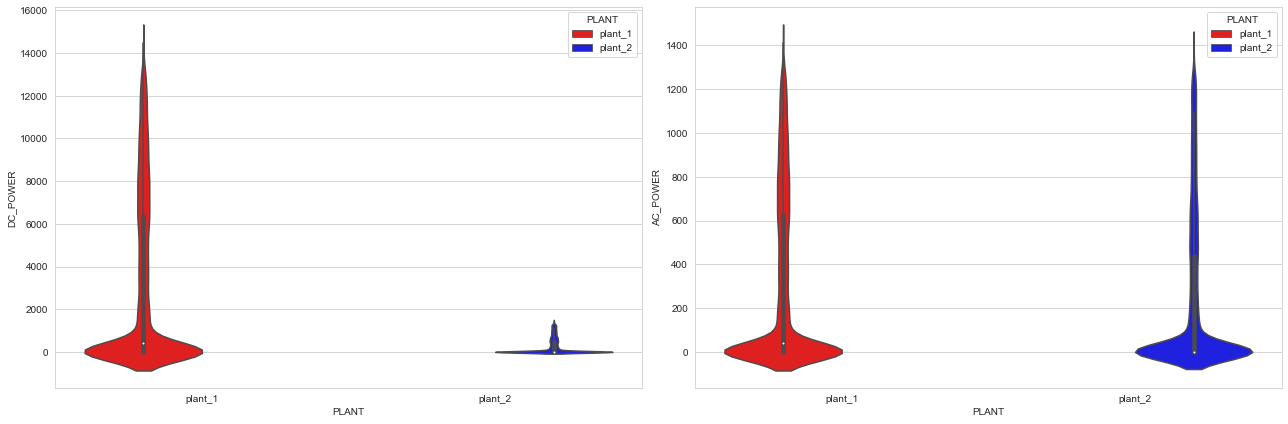

In [12]:

fig,ax = plt.subplots(1, 2, figsize=(18, 6))

sns.violinplot(data=sp_df, x='PLANT', y='DC_POWER', hue='PLANT', palette={'plant_1':'r','plant_2':'b'}, scale='count', ax=ax[0])
sns.violinplot(data=sp_df, x='PLANT', y='AC_POWER', hue='PLANT', palette={'plant_1':'r','plant_2':'b'}, scale='count', ax=ax[1])

fig.tight_layout()
plt.show()

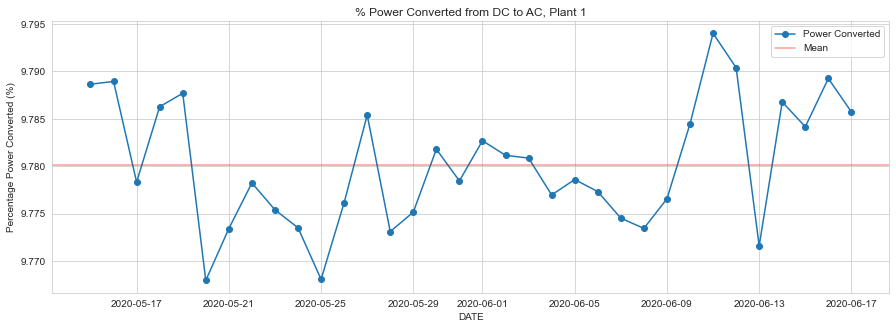

In [13]:


plt.figure(figsize=(15,5))

conv1 = p1_df.copy()
conv1['DATE'] = pd.to_datetime(conv1['DATE_TIME']).dt.date
conv1 = conv1.groupby('DATE').sum()
conv1['CONV_POWER'] = conv1['AC_POWER']/conv1['DC_POWER']*100

conv1['CONV_POWER'].plot(style = 'o-',label = 'Power Converted')

plt.axhline(conv1['CONV_POWER'].mean(), linestyle='-', color='r', alpha=0.4, label='Mean')

plt.title('% Power Converted from DC to AC, Plant 1')
plt.ylabel('Percentage Power Converted (%)')
plt.legend()
plt.show()

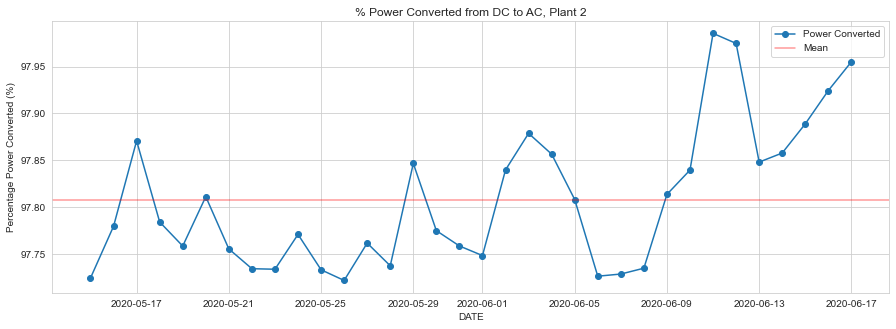

In [14]:

plt.figure(figsize=(15,5))

conv2 = p2_df.copy()
conv2['DATE'] = pd.to_datetime(conv2['DATE_TIME']).dt.date
conv2 = conv2.groupby('DATE').sum()
conv2['CONV_POWER'] = conv2['AC_POWER']/conv2['DC_POWER']*100

conv2['CONV_POWER'].plot(style='o-',label='Power Converted')

plt.axhline(conv2['CONV_POWER'].mean(), linestyle='-', color='r', alpha=0.4, label='Mean')

plt.title('% Power Converted from DC to AC, Plant 2')
plt.ylabel('Percentage Power Converted (%)')
plt.legend()
plt.show()

#### *The mean is ~97.81, which is about 10x the mean of Plant 1. Most likely, there was a translation error in the DC_POWER column of Plant 2, so this should be corrected.*

In [15]:
# Adjust DC_POWER column for Plant 2 in sp_df and p2_df

sp_df.loc[sp_df.PLANT == 'plant_2', 'DC_POWER'] = sp_df.loc[sp_df.PLANT == 'plant_2','DC_POWER']*10

p2_df['DC_POWER_s'] = p2_df['DC_POWER'] * 10

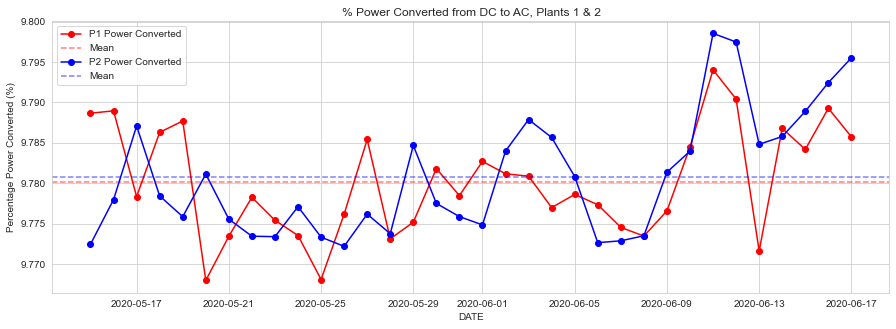

In [16]:

plt.figure(figsize=(15,5))

conv2 = p2_df.copy()
conv2['DATE'] = pd.to_datetime(conv2['DATE_TIME']).dt.date
conv2 = conv2.groupby('DATE').sum()
conv2['CONV_POWER'] = conv2['AC_POWER']/conv2['DC_POWER_s']*100

conv1['CONV_POWER'].plot(style='o-', c='r', label='P1 Power Converted')
plt.axhline(conv1['CONV_POWER'].mean(), linestyle='--', color='r', alpha=0.5, label='Mean')

conv2['CONV_POWER'].plot(style='o-', c='b', label='P2 Power Converted')
plt.axhline(conv2['CONV_POWER'].mean(), linestyle='--', color='b', alpha=0.5, label='Mean')

plt.title('% Power Converted from DC to AC, Plants 1 & 2')
plt.ylabel('Percentage Power Converted (%)')
plt.legend()
plt.show()

#### *This makes more sense, the percent converted power curves and mean values for the two plants are very similar now.*

<AxesSubplot:xlabel='TIME'>

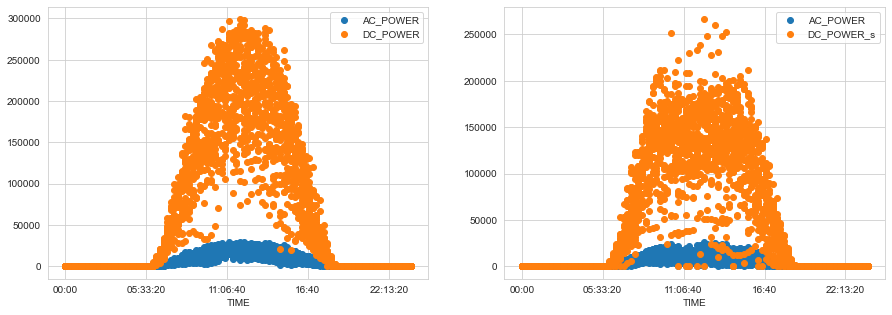

In [17]:
fig,ax = plt.subplots(1, 2, figsize=(15,5))

p1_test = p1_df.groupby('DATE_TIME').sum().reset_index()
p1_test['TIME']= pd.to_datetime(p1_test['DATE_TIME']).dt.time

p1_test.set_index('TIME')[['AC_POWER', 'DC_POWER']].plot(style='o', ax=ax[0])

p2_test = p2_df.groupby('DATE_TIME').sum().reset_index()
p2_test['TIME']= pd.to_datetime(p2_test['DATE_TIME']).dt.time

p2_test.set_index('TIME')[['AC_POWER', 'DC_POWER_s']].plot(style='o', ax=ax[1])

#### *Even with the adjusted DC Power column for Plant 2, it still appears to have a much less consistent daily DC and AC power.*

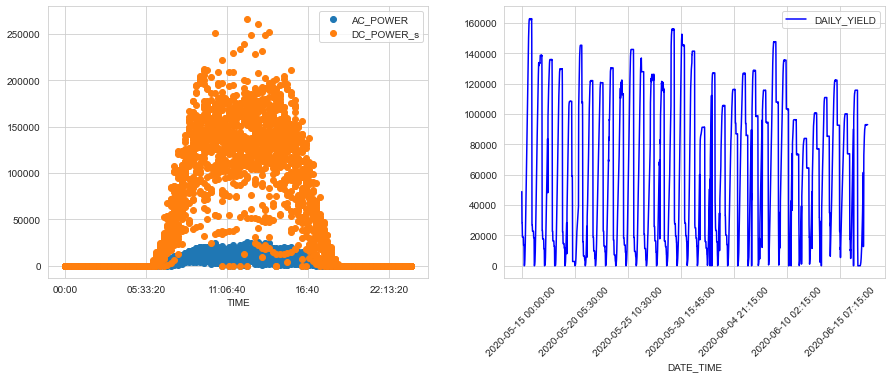

In [18]:
fig,ax = plt.subplots(1, 2, figsize=(15,5))

p2_test = p2_df.groupby('DATE_TIME').sum().reset_index()
p2_test['TIME']= pd.to_datetime(p2_test['DATE_TIME']).dt.time

p2_test.set_index('TIME')[['AC_POWER', 'DC_POWER_s']].plot(style='o', ax=ax[0])

p2_test.plot(x='DATE_TIME', y='DAILY_YIELD', c='b', ax=ax[1])

ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)

plt.show()

#### *From the daily yield curve, there are some days with significantly lower daily yield, perhaps due to faulty equipment or weather-related issues that resulted lower than expected yield. Additionally, it appears that the first half of the month is much more consistent.*

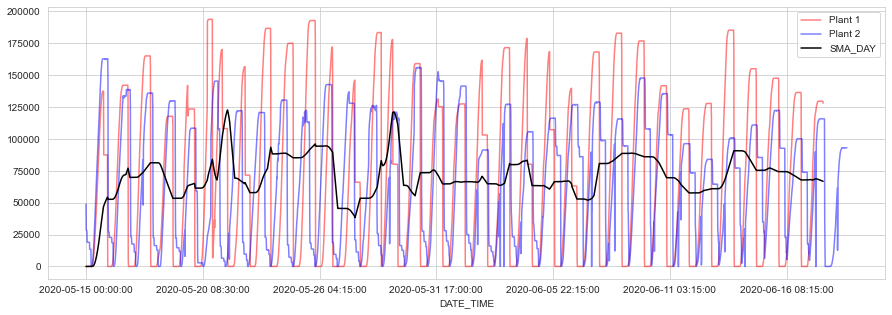

In [19]:
fig,ax = plt.subplots(figsize=(15,5))

p1_test['SMA_DAY'] = p1_test['DAILY_YIELD'].rolling(96, min_periods=1).mean()

p1_test.plot(x='DATE_TIME', y='DAILY_YIELD', c='r', alpha=0.5, label='Plant 1', ax=ax)
p2_test.plot(x='DATE_TIME', y='DAILY_YIELD', c='b', alpha=0.5, label='Plant 2', ax=ax)
p1_test.plot(x='DATE_TIME', y='SMA_DAY', c='k', ax=ax)

plt.legend()
plt.show()

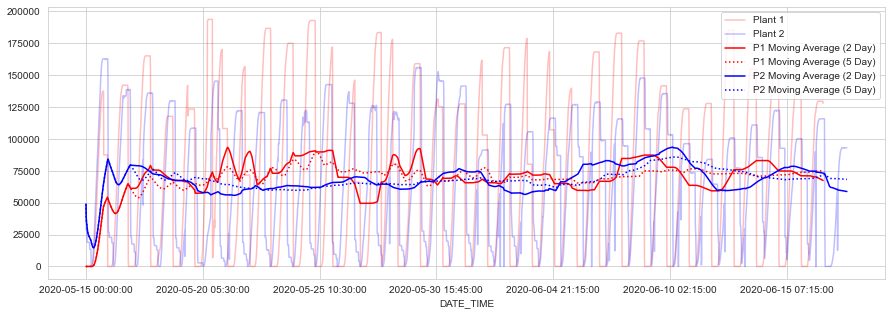

In [20]:
fig,ax = plt.subplots(figsize=(15,5))

p1_test['SMA_2DAY'] = p1_test['DAILY_YIELD'].rolling(192, min_periods=1).mean()
p1_test['SMA_5DAY'] = p1_test['DAILY_YIELD'].rolling(480, min_periods=1).mean()

p2_test['SMA_2DAY'] = p2_test['DAILY_YIELD'].rolling(192, min_periods=1).mean()
p2_test['SMA_5DAY'] = p2_test['DAILY_YIELD'].rolling(480, min_periods=1).mean()

p1_test.plot(x='DATE_TIME', y='DAILY_YIELD', c='r', alpha=0.25, label='Plant 1', ax=ax)
p2_test.plot(x='DATE_TIME', y='DAILY_YIELD', c='b', alpha=0.25, label='Plant 2', ax=ax)

p1_test.plot(x='DATE_TIME', y='SMA_2DAY', c='r', linestyle='-', label='P1 Moving Average (2 Day)', ax=ax)
p1_test.plot(x='DATE_TIME', y='SMA_5DAY', c='r', linestyle='dotted', label='P1 Moving Average (5 Day)',ax=ax)
p2_test.plot(x='DATE_TIME', y='SMA_2DAY', c='b', linestyle='-', label='P2 Moving Average (2 Day)',ax=ax)
p2_test.plot(x='DATE_TIME', y='SMA_5DAY', c='b', linestyle='dotted', label='P2 Moving Average (5 Day)',ax=ax)

plt.legend()
plt.show()

#### *When the daily yield curves are overlain on each other, Plant 1 appears performing better on average, though the 2- and 5-day moving averages suggest there are only a few multi-day periods where the difference is significant.*

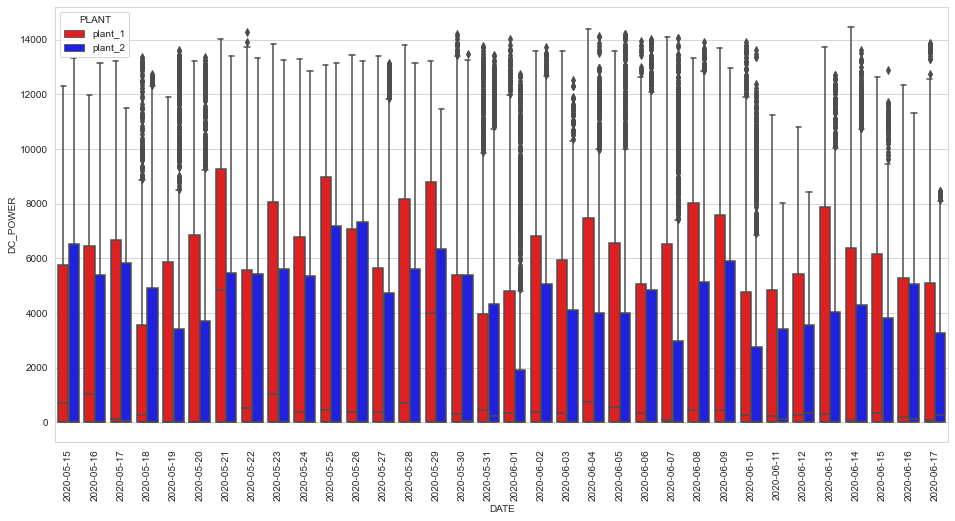

In [21]:
fig, ax = plt.subplots(figsize=(16,8))

sp_df['TIME'] = pd.to_datetime(sp_df['DATE_TIME']).dt.time
sp_df['DATE'] = pd.to_datetime(sp_df['DATE_TIME']).dt.date


sns.boxplot(x='DATE', y='DC_POWER', hue='PLANT', palette={'plant_1':'r','plant_2':'b'}, data=sp_df, ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

#### *This doesn't look great, since it's heavily impacted by the zero values overnight when no DC Power is being generated.*

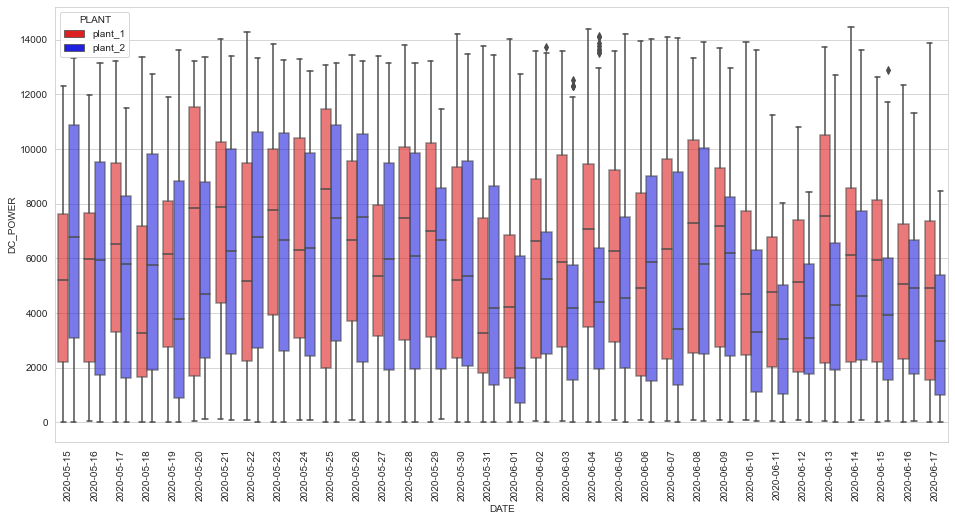

In [22]:

fig, ax = plt.subplots(figsize=(16,8))

sp_df['TIME'] = pd.to_datetime(sp_df['DATE_TIME']).dt.time
sp_df['DATE'] = pd.to_datetime(sp_df['DATE_TIME']).dt.date
spdf_noz = sp_df.loc[(sp_df['DC_POWER'] != 0)]

sns.boxplot(x='DATE', y='DC_POWER', hue='PLANT', palette={'plant_1':'r','plant_2':'b'}, data=spdf_noz, boxprops=dict(alpha=0.6), ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

#### *Dropping all zero values for the DC Power column makes this much more readable. Plant 2 is generally lower across the month of values. When Plant 1 does exceptionally poorly, Plant 2 does quite poorly as well.*

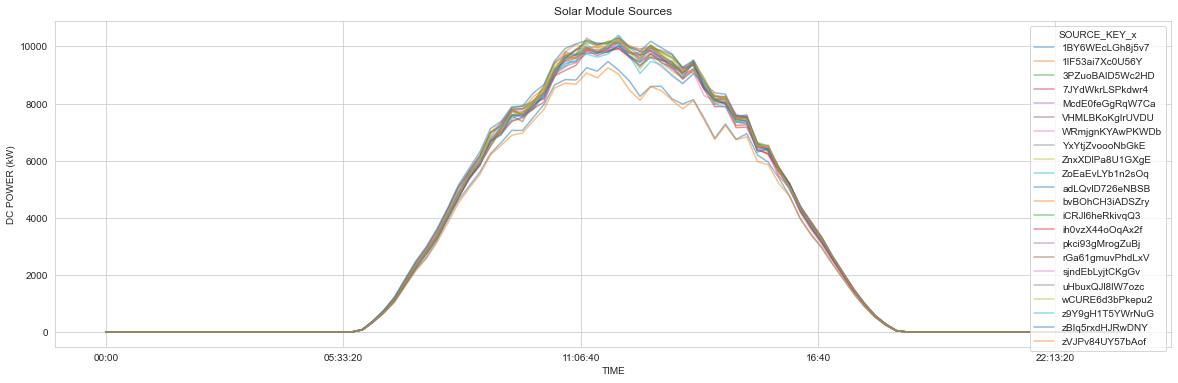

In [23]:
# Plot Plant 1 daily DC Power averages for each solar module

p1_srcs=p1_df.copy()
p1_srcs['TIME'] = pd.to_datetime(p1_srcs['DATE_TIME']).dt.time
p1_srcs = p1_srcs.groupby(['TIME','SOURCE_KEY_x'])['DC_POWER'].mean().unstack()

p1_srcs.plot(figsize=(20,6), alpha=0.5)

plt.title('Solar Module Sources')
plt.ylabel('DC POWER (kW)')
plt.show()

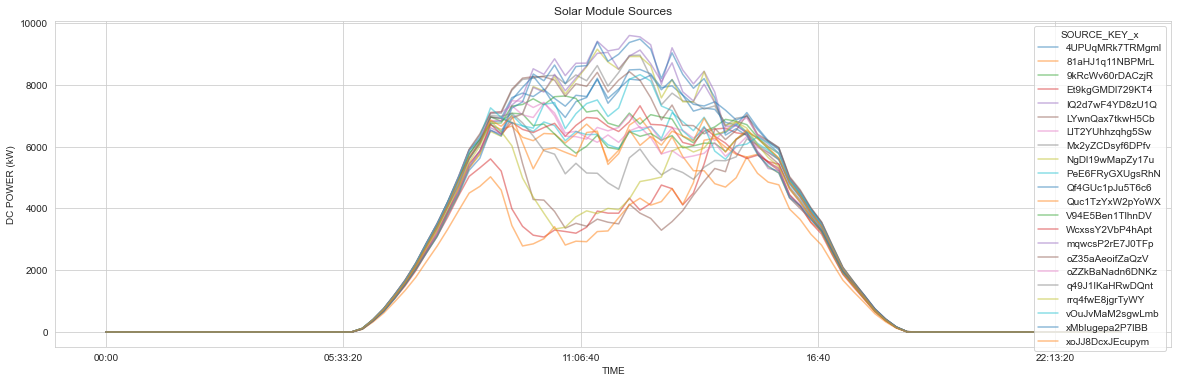

In [24]:
# Plot Plant 2 daily DC Power averages for each solar module

p2_srcs=p2_df.copy()
p2_srcs['TIME'] = pd.to_datetime(p2_srcs['DATE_TIME']).dt.time
p2_srcs = p2_srcs.groupby(['TIME','SOURCE_KEY_x'])['DC_POWER_s'].mean().unstack()

p2_srcs.plot(figsize=(20,6), alpha=0.5)

plt.title('Solar Module Sources')
plt.ylabel('DC POWER (kW)')
plt.show()

#### *In Plant 1, there are only two modules that appear to be performing slightly worse than others, on average. The distribution for Plant 2 is much more scattered, a clear departure from Plant 1, and there are at least 4 modules that are performing much morse than others.*

In [25]:
# Which variables are highly correlated in Plant 1?

p1corr = p1_df.drop(['PLANT_ID_x', 'PLANT_ID_y'], axis=1)

p1c = p1corr.corr(method='spearman')
p1c

DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD  \
DC_POWER             1.000000  1.000000     0.218737    -0.000856   
AC_POWER             1.000000  1.000000     0.218727    -0.000856   
DAILY_YIELD          0.218737  0.218727     1.000000     0.012204   
TOTAL_YIELD         -0.000856 -0.000856     0.012204     1.000000   
AMBIENT_TEMPERATURE  0.744799  0.744774     0.553952    -0.054635   
MODULE_TEMPERATURE   0.899641  0.899628     0.394401    -0.028260   
IRRADIATION          0.987896  0.987893     0.217696    -0.007210   

                     AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  
DC_POWER                        0.744799            0.899641     0.987896  
AC_POWER                        0.744774            0.899628     0.987893  
DAILY_YIELD                     0.553952            0.394401     0.217696  
TOTAL_YIELD                    -0.054635           -0.028260    -0.007210  
AMBIENT_TEMPERATURE             1.000000            0.910235     0.747060  
MODULE_TEMPERATURE              0.910235            1.000000     0.901496  
IRRADIATION                     0.747060            0.901496     1.000000

In [26]:
# Which variables are highly correlated in Plant 2?

p2corr = p2_df.drop(['PLANT_ID_x', 'PLANT_ID_y','DC_POWER'], axis=1)

p2c = p2corr.corr(method='spearman')
p2c

AC_POWER  DAILY_YIELD  TOTAL_YIELD  AMBIENT_TEMPERATURE  \
AC_POWER             1.000000     0.048951     0.006098             0.546910   
DAILY_YIELD          0.048951     1.000000    -0.066776             0.344313   
TOTAL_YIELD          0.006098    -0.066776     1.000000            -0.021525   
AMBIENT_TEMPERATURE  0.546910     0.344313    -0.021525             1.000000   
MODULE_TEMPERATURE   0.703575     0.181923    -0.019491             0.917311   
IRRADIATION          0.810575    -0.037260    -0.014930             0.666816   
DC_POWER_s           1.000000     0.048951     0.006092             0.546913   

                     MODULE_TEMPERATURE  IRRADIATION  DC_POWER_s  
AC_POWER                       0.703575     0.810575    1.000000  
DAILY_YIELD                    0.181923    -0.037260    0.048951  
TOTAL_YIELD                   -0.019491    -0.014930    0.006092  
AMBIENT_TEMPERATURE            0.917311     0.666816    0.546913  
MODULE_TEMPERATURE             1.000000     0.858128    0.703582  
IRRADIATION                    0.858128     1.000000    0.810586  
DC_POWER_s                     0.703582     0.810586    1.000000

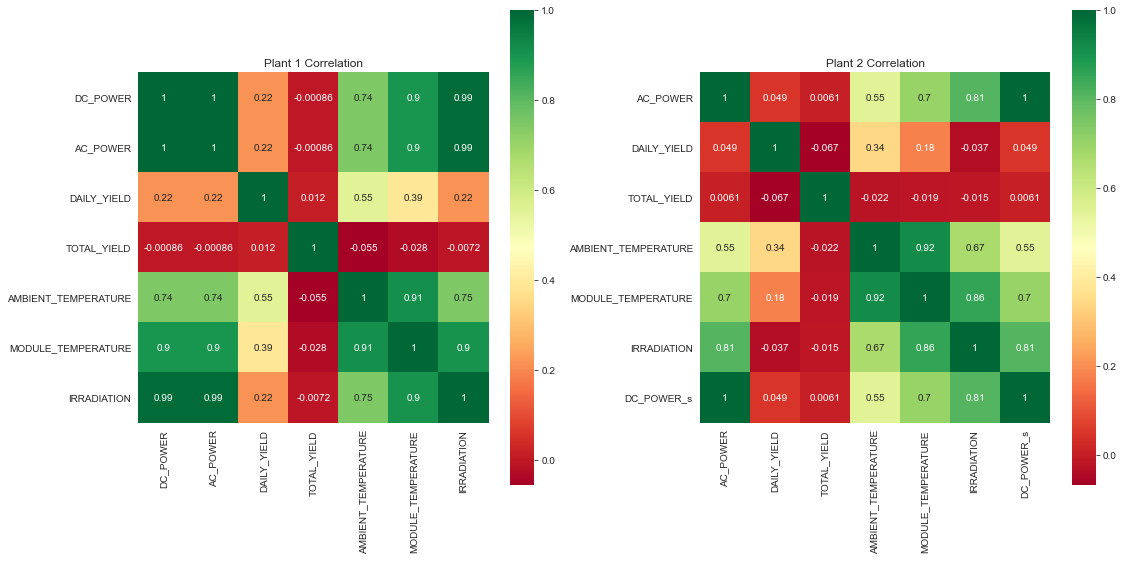

In [27]:
# Visualize these correlations

fig, ax = plt.subplots(1, 2, figsize=(16,8))
sns.heatmap(p1c, cmap='RdYlGn', annot=True, square=True, ax=ax[0])
sns.heatmap(p2c, cmap='RdYlGn', annot=True, square=True, ax=ax[1])

ax[0].set_title('Plant 1 Correlation')
ax[1].set_title('Plant 2 Correlation')

plt.tight_layout()
plt.show()

#### *DC and AC power are perfectly correlated, and both are highly correlated with Module Temperature and Irradiation.*

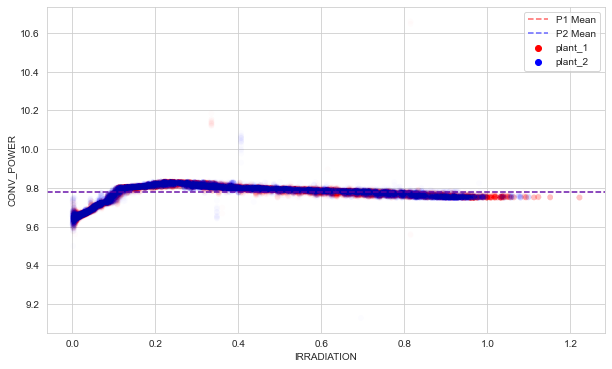

In [28]:
sp_df['CONV_POWER'] = sp_df['AC_POWER']/sp_df['DC_POWER']*100

fig, ax = plt.subplots(figsize=(10,6))

sns.scatterplot(x='IRRADIATION', y='CONV_POWER', hue='PLANT', palette={'plant_1':'r', 'plant_2':'b'}, data=sp_df, alpha=0.01, ax=ax)

plt.axhline(conv1['CONV_POWER'].mean(), linestyle='--', color='r', alpha=0.6, label='P1 Mean')
plt.axhline(conv2['CONV_POWER'].mean(), linestyle='--', color='b', alpha=0.6, label='P2 Mean')


plt.legend()
plt.show()

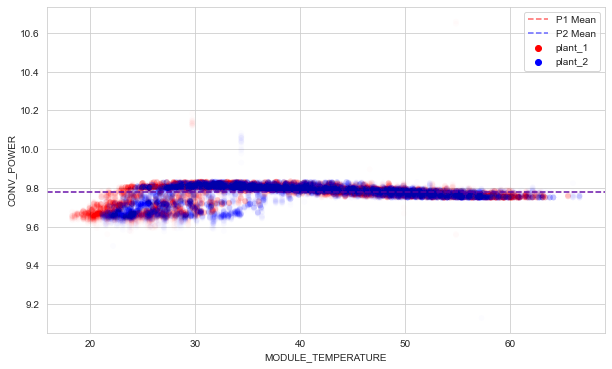

In [29]:
# At what module temperature is the converted power percentage the greatest?

fig, ax = plt.subplots(figsize=(10,6))

sns.scatterplot(x='MODULE_TEMPERATURE', y='CONV_POWER', hue='PLANT', palette={'plant_1':'r', 'plant_2':'b'}, data=sp_df, alpha=0.01, ax=ax)

plt.axhline(conv1['CONV_POWER'].mean(), linestyle='--', color='r', alpha=0.6, label='P1 Mean')
plt.axhline(conv2['CONV_POWER'].mean(), linestyle='--', color='b', alpha=0.6, label='P2 Mean')

plt.legend()
plt.show()

#### *Module Temperature is less clearly correlated with Converted Power than Irradiation is. The relationship between Irradiation and Converted Power has very little scatter, whereas at Module Temperatures below 40 there is more scatter in converted power. Converted Power is above average between certain values: Irradiation of 0.1 to 0.6, and Module Temperature above ~25 degrees and below 50.*

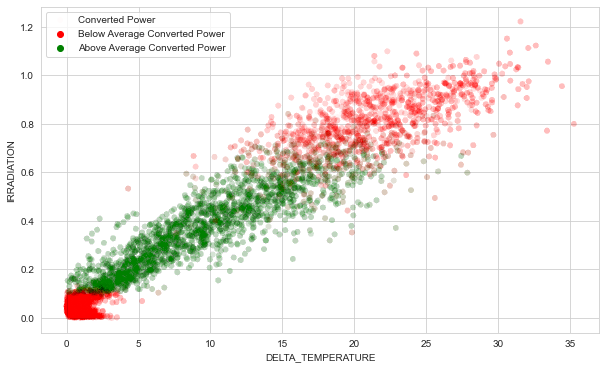

In [30]:
# Create Delta Temperature column, plot versus Irradiation and color by average ConvPower

fig, ax = plt.subplots(figsize=(10,6))

sp_df['DELTA_TEMPERATURE'] = abs(sp_df['AMBIENT_TEMPERATURE'] - sp_df['MODULE_TEMPERATURE'])
bins = [0, 9.78, 10]
labels = ['Below_Av', 'Above_Av']
sp_df['BINNED'] = pd.cut(sp_df['CONV_POWER'], bins=bins, labels=labels)


sns.scatterplot(x='DELTA_TEMPERATURE', y='IRRADIATION', hue='BINNED', palette={'Below_Av':'r', 'Above_Av':'g'}, data=sp_df, alpha=0.01)

plt.legend(['Converted Power', 'Below Average Converted Power', 'Above Average Converted Power'])
plt.show()

#### *This plot clearly shows the optimal 'delta temperature' and irradiation values to obtain above average power conversion for the two plants.*

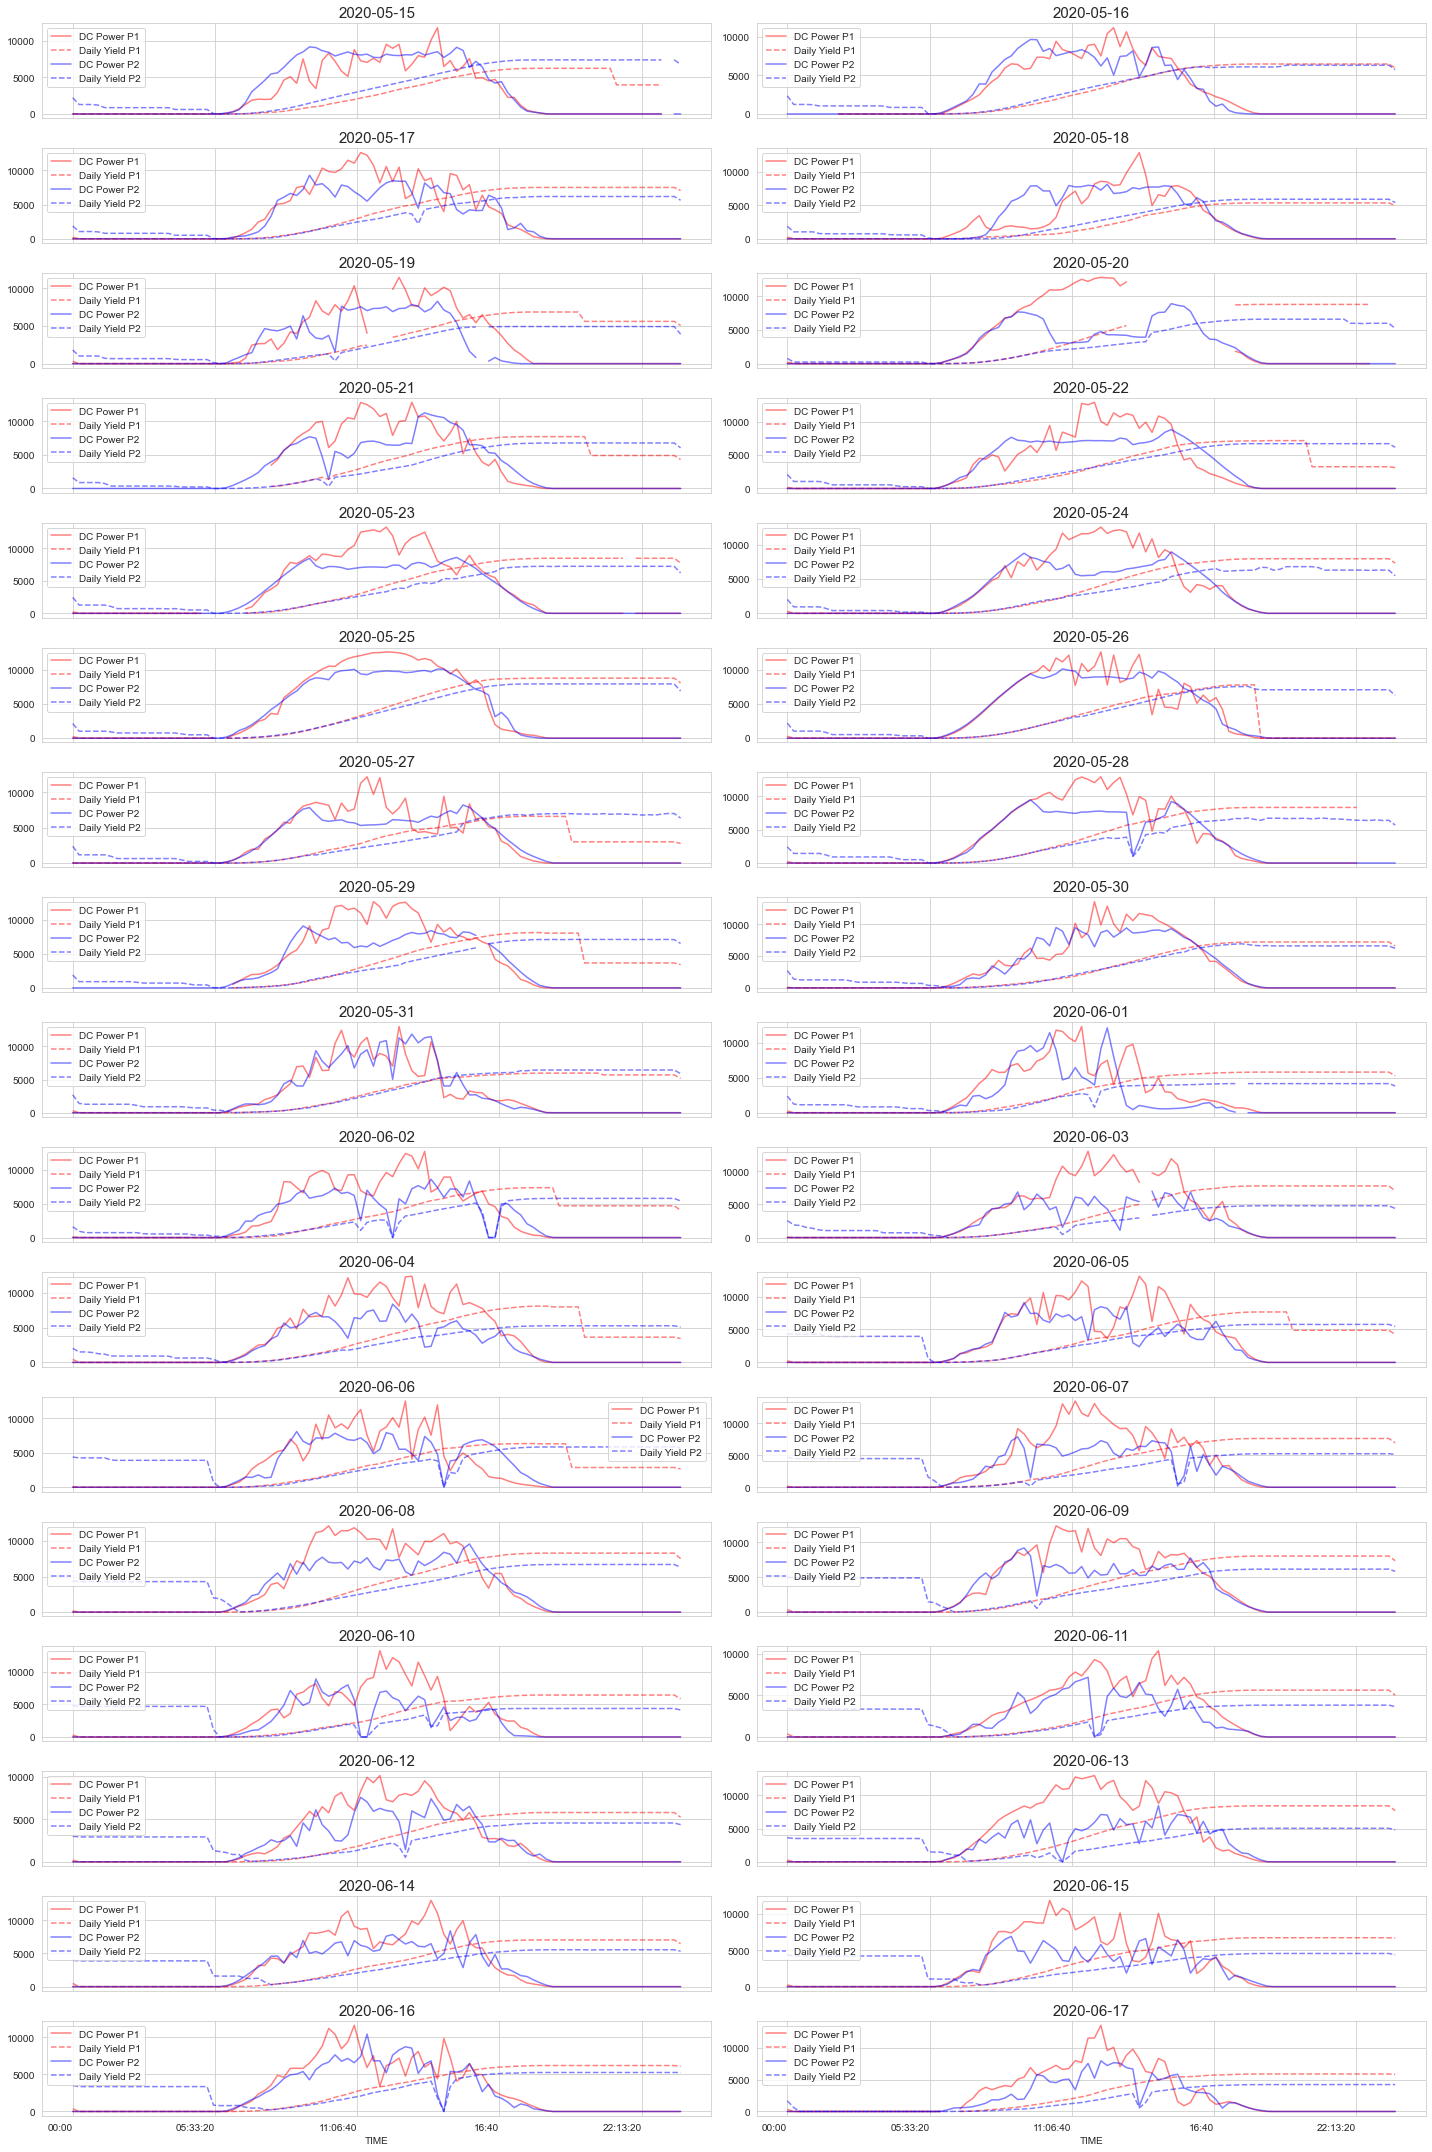

In [31]:
# Plot DC Power and Daily Yield for each day and each plant

p1_df['TIME'] = pd.to_datetime(p1_df['DATE_TIME']).dt.time
p1_df['DATE'] = pd.to_datetime(p1_df['DATE_TIME']).dt.date
p2_df['TIME'] = pd.to_datetime(p2_df['DATE_TIME']).dt.time
p2_df['DATE'] = pd.to_datetime(p2_df['DATE_TIME']).dt.date
c1 = p1_df.groupby(['TIME','DATE'])['DC_POWER'].mean().unstack()
c2 = p2_df.groupby(['TIME','DATE'])['DC_POWER'].mean().unstack()

ax = p1_df.groupby(['TIME','DATE'])['DC_POWER'].mean().unstack().plot(color='r', alpha=0.5, sharex=True,subplots=True,layout=(17,2),figsize=(20,30))
p1_df.groupby(['TIME','DATE'])['DAILY_YIELD'].mean().unstack().plot(color='r', alpha=0.5,subplots=True,figsize=(20,20),style='--',ax=ax)

p2_df.groupby(['TIME','DATE'])['DC_POWER_s'].mean().unstack().plot(color='b', alpha=0.5,subplots=True,figsize=(20,30),ax=ax)
p2_df.groupby(['TIME','DATE'])['DAILY_YIELD'].mean().unstack().plot(color='b', alpha=0.5,subplots=True,figsize=(20,20),style='--',ax=ax)



i=0
for a in range(len(ax)):
    for b in range(len(ax[a])):
        ax[a,b].set_title(c1.columns[i],size=15)
        ax[a,b].legend(['DC Power P1','Daily Yield P1','DC Power P2','Daily Yield P2'])
        i=i+1

plt.tight_layout()
plt.show()


#### *Observations: Plant 1 behaves very well, only a few small periods without DC Power and Daily Yield recorded values. Plant 2 also only has a few small periods without recorded values, but there is an odd phenomenon: the daily yield being high in the early hours of the day, dropping off through the morning and then rising throughout the rest of the day. This is odd, and doesn't make sense, perhaps an artifact?*

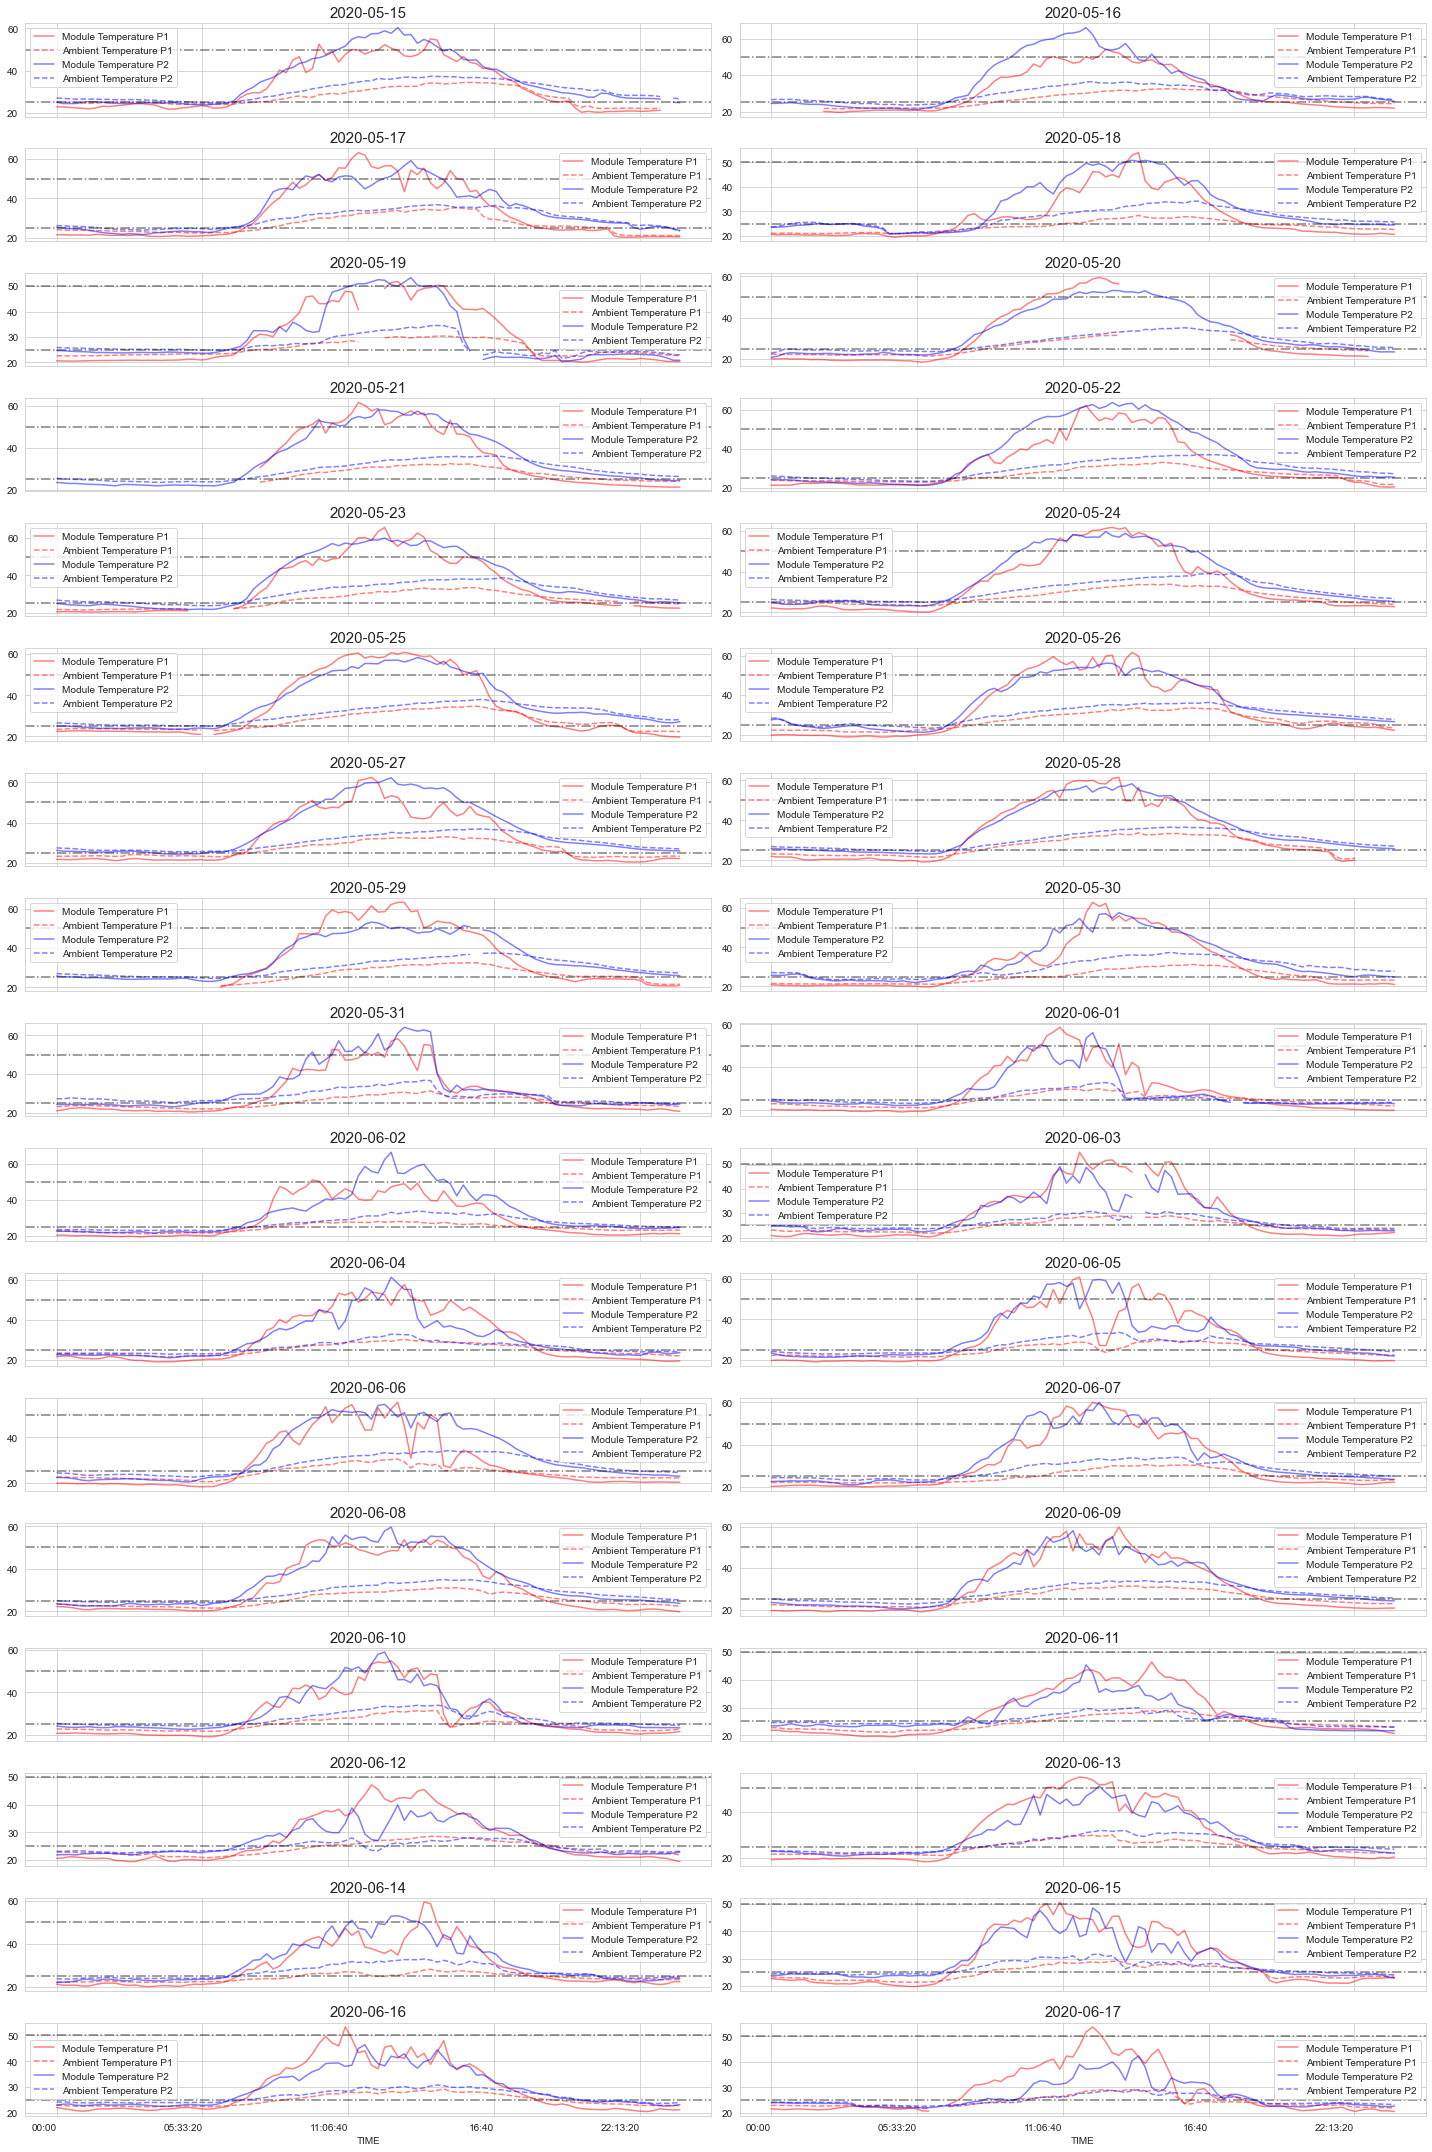

In [32]:
# Plot Module Temp and Ambient Temp for each day and each plant

p1_df['TIME'] = pd.to_datetime(p1_df['DATE_TIME']).dt.time
p1_df['DATE'] = pd.to_datetime(p1_df['DATE_TIME']).dt.date
p2_df['TIME'] = pd.to_datetime(p2_df['DATE_TIME']).dt.time
p2_df['DATE'] = pd.to_datetime(p2_df['DATE_TIME']).dt.date
c1 = p1_df.groupby(['TIME','DATE'])['MODULE_TEMPERATURE'].mean().unstack()
#c2 = p2_df.groupby(['TIME','DATE'])['MODULE_TEMPERATURE'].mean().unstack()

ax = p1_df.groupby(['TIME','DATE'])['MODULE_TEMPERATURE'].mean().unstack().plot(color='r', alpha=0.5, sharex=True,subplots=True, layout=(17,2),figsize=(20,30))
p1_df.groupby(['TIME','DATE'])['AMBIENT_TEMPERATURE'].mean().unstack().plot(color='r', alpha=0.5, subplots=True,figsize=(20,20),style='--',ax=ax)

p2_df.groupby(['TIME','DATE'])['MODULE_TEMPERATURE'].mean().unstack().plot(color='b', alpha=0.5, subplots=True,figsize=(20,30), ax=ax)
p2_df.groupby(['TIME','DATE'])['AMBIENT_TEMPERATURE'].mean().unstack().plot(color='b', alpha=0.5, subplots=True,figsize=(20,20),style='--',ax=ax)



i=0
for a in range(len(ax)):
    for b in range(len(ax[a])):
        ax[a,b].axhline(50, color='k',linestyle='-.', alpha=0.5)
        ax[a,b].axhline(25, color='k',linestyle='-.', alpha=0.5)
        ax[a,b].set_title(c1.columns[i],size=15)
        ax[a,b].legend(['Module Temperature P1','Ambient Temperature P1','Module Temperature P2','Ambient Temperature P2'])
        i=i+1

plt.tight_layout()
plt.show()


#### *There are a few larger gaps in the temperature data for both plants. These take place when the temperature rises significantly, though there is no clear level at which the sensors stop recording regularly. Picking a proper period for a training set should consider a complete set of daily yield values and and temperature data for a series of continuous days.*

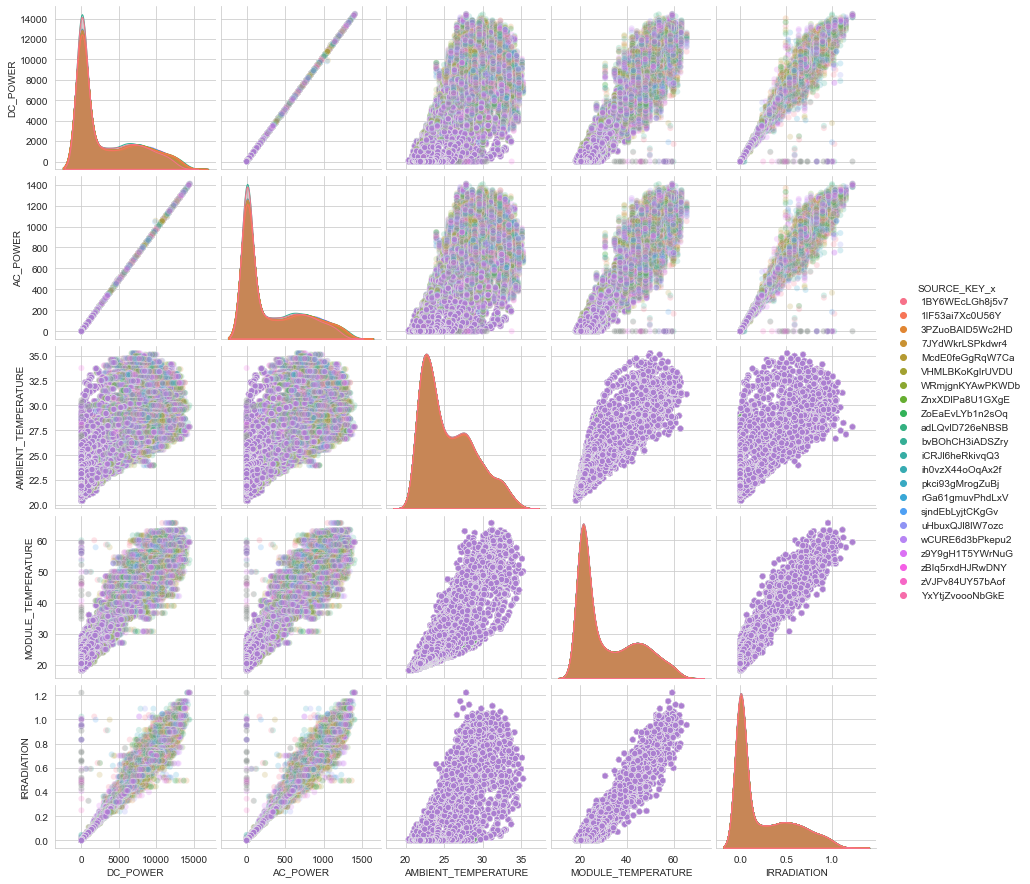

In [33]:
# Create pairplots for each plant

p1_hm = p1_df.copy()
#p1_hm['TIME'] = pd.to_datetime(p1_hm['DATE_TIME']).dt.time
cols = ['DATE_TIME', 'SOURCE_KEY_x', 'DC_POWER', 'AC_POWER', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']
p1_hm = p1_df[cols]
p1_hm.set_index('DATE_TIME')


sns.pairplot(p1_hm, hue='SOURCE_KEY_x',kind='scatter', plot_kws={'alpha':0.2})


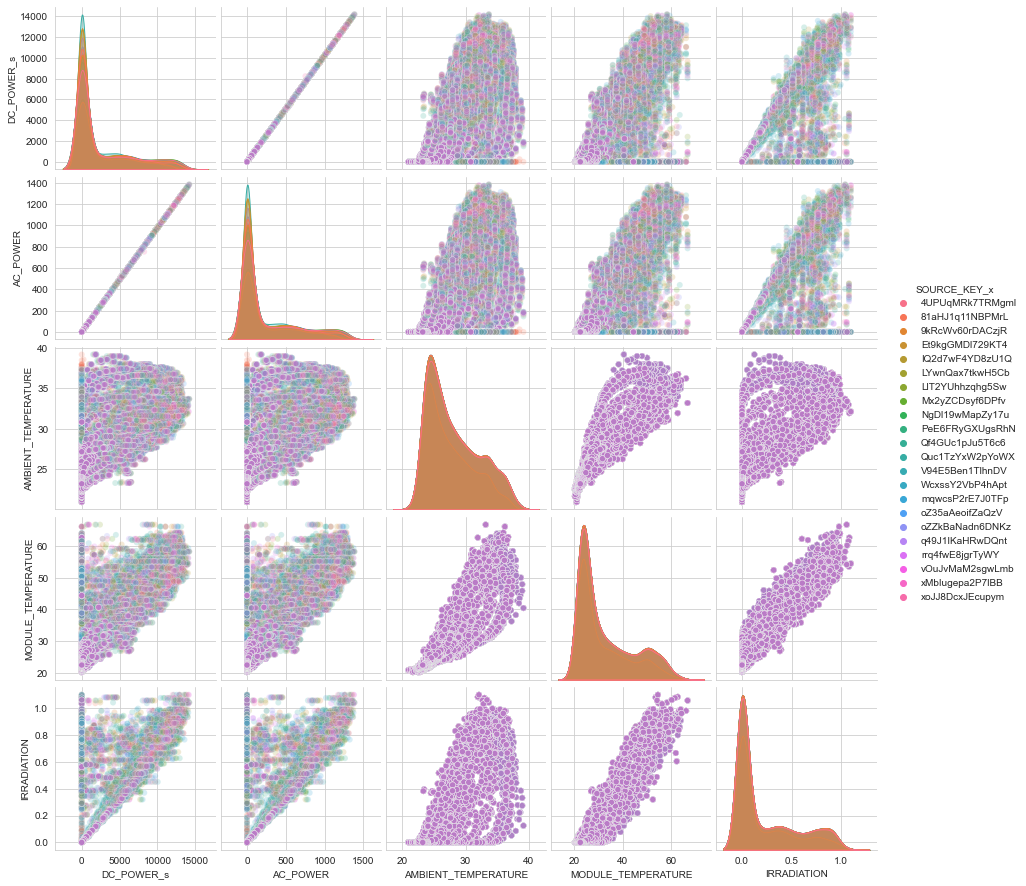

In [34]:
p2_hm = p2_df.copy()
#p1_hm['TIME'] = pd.to_datetime(p1_hm['DATE_TIME']).dt.time
cols = ['DATE_TIME', 'SOURCE_KEY_x', 'DC_POWER_s', 'AC_POWER', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']
p2_hm = p2_df[cols]
p2_hm.set_index('DATE_TIME')


sns.pairplot(p2_hm, hue='SOURCE_KEY_x', kind='scatter', plot_kws={'alpha':0.2})